<a href="https://colab.research.google.com/github/ms-jayanth/Annalect_Assignment/blob/main/Modeling_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Necessary Libraraies and Importing Data

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_percentage_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
modeling_data = pd.read_excel('/content/sample_data/Modeling dataset.xlsx')
modeling_data.head()

,model,month,gas_price,discount,sales,TV,YouTube,Radio,Print
0,altima,2018-04-01,2.757,2169.005767,6799,0.0,6.313814e-06,0.000000,1.398882
1,altima,2018-05-01,2.901,4745.168681,14992,0.0,6.313814e-06,3.300356,0.224208
2,altima,2018-06-01,2.891,4895.379638,19572,0.0,7.892268e-07,6.479757,0.147138
3,altima,2018-07-01,2.849,4923.842447,14876,0.0,0.000000e+00,11.619001,0.680676
4,altima,2018-08-01,2.836,5026.378048,14656,0.0,0.000000e+00,32.458100,1.633934


###Initital Check

In [3]:
modeling_data.shape

(36, 9)

In [4]:
modeling_data.dtypes

,0
model,object
month,datetime64[ns]
gas_price,float64
discount,float64
sales,int64
TV,float64
YouTube,float64
Radio,float64
Print,float64


In [5]:
modeling_data.isna().sum()

,0
model,0
month,0
gas_price,0
discount,0
sales,0
TV,0
YouTube,0
Radio,0
Print,0


In [6]:
modeling_data.duplicated().sum()

np.int64(0)

In [7]:
modeling_data.describe(include='all')

,model,month,gas_price,discount,sales,TV,YouTube,Radio,Print
count,36,36,36.000000,36.000000,36.000000,36.000000,3.600000e+01,36.000000,36.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,altima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2019-09-16 02:40:00,2.494250,3566.030390,9401.722222,36.279812,4.061885e+01,82.869923,0.941544
min,NaN,2018-04-01 00:00:00,1.841000,2169.005767,3837.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,NaN,2018-12-24 06:00:00,2.224250,3226.258937,7590.000000,0.000000,7.892268e-07,6.727247,0.191927
50%,NaN,2019-09-16 00:00:00,2.551500,3414.457758,8562.000000,0.000000,3.551521e-05,38.560813,0.370455
75%,NaN,2020-06-08 12:00:00,2.767250,3639.945603,10565.250000,25.079755,3.940414e+01,147.026753,1.303197
max,NaN,2021-03-01 00:00:00,2.901000,5026.378048,19572.000000,379.190176,3.040165e+02,295.444827,4.609808


###1.Analyze Sales of Altima using a Linear Regression model.

###2. Which is your dependent variable?


####Here 'Sales' is the dependent variable.

Here, I am removing the 'Model' and 'Month' columns.

I am removing the 'Month' column because it is in datetime format, which can be treated as categorical. We could convert it into dummy variables to analyze the impact of each month, but for now, I’m removing it for simplicity.

In [8]:
linear_model = smf.ols('sales~gas_price+discount+TV+YouTube+Radio+Print',data=modeling_data).fit()

In [9]:
linear_model.params

,0
Intercept,-14346.612679
gas_price,5066.776012
discount,3.210146
TV,-4.943847
YouTube,12.361612
Radio,4.238125
Print,-1073.676116


In [10]:
print(linear_model.tvalues, '\n', linear_model.pvalues)

Intercept   -5.097288
gas_price    4.267673
discount     5.536537
TV          -0.916974
YouTube      2.073225
Radio        1.091019
Print       -3.507798
dtype: float64 
 Intercept    0.000019
gas_price    0.000193
discount     0.000006
TV           0.366719
YouTube      0.047141
Radio        0.284247
Print        0.001494
dtype: float64


###3.Which variables are significant in the model?

In [11]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     14.08
Date:                Mon, 23 Jun 2025   Prob (F-statistic):           1.90e-07
Time:                        05:15:23   Log-Likelihood:                -316.58
No. Observations:                  36   AIC:                             647.2
Df Residuals:                      29   BIC:                             658.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.435e+04   2814.558     -5.097      0.000   -2.01e+04   -8590.195
gas_price   5066.7760   1187.246      4.268      0.000    2638.586    7494.966
discount       3.2101      0.580      5.537      0.000       2.024       4.396
TV            -4.9438      5.391     -0.917      0.367     -15.971       6.083
YouTube       12.3616      5.963      2.073      0.047       0.167      24.556
Radio          4.2381      3.885      1.091      0.284      -3.707      12.183
Print      -1073.6761    306.083     -3.508      0.001   -1699.685    -447.667
==============================================================================
Omnibus:                        0.338   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.320
Skew:                           0.203   Prob(JB):                        0.852
Kurtosis:                       2.778   Cond. No.                     3.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A variable is considered statistically significant if its p-value < 0.05.


1.   gas_price
2.   discount
3.   YouTube
4.   Print
are the variables that are significant to the model.


###4. How did you evaluate them?
We evaluate variable significance using the p-value from the regression summary.

If p-value < 0.05, the variable is statistically significant, meaning it has a meaningful impact on the dependent variable (sales).

If p-value > 0.05, the variable is not significant.


###5. What is the R2 and Adjusted R2 of the model?

In [12]:
print('R value is:',linear_model.rsquared,'R_2 value is:',linear_model.rsquared_adj)

R value is: 0.7444582961037645 R_2 value is: 0.6915875987459226


###6. Do you observe multicollinearity in the independent variables?

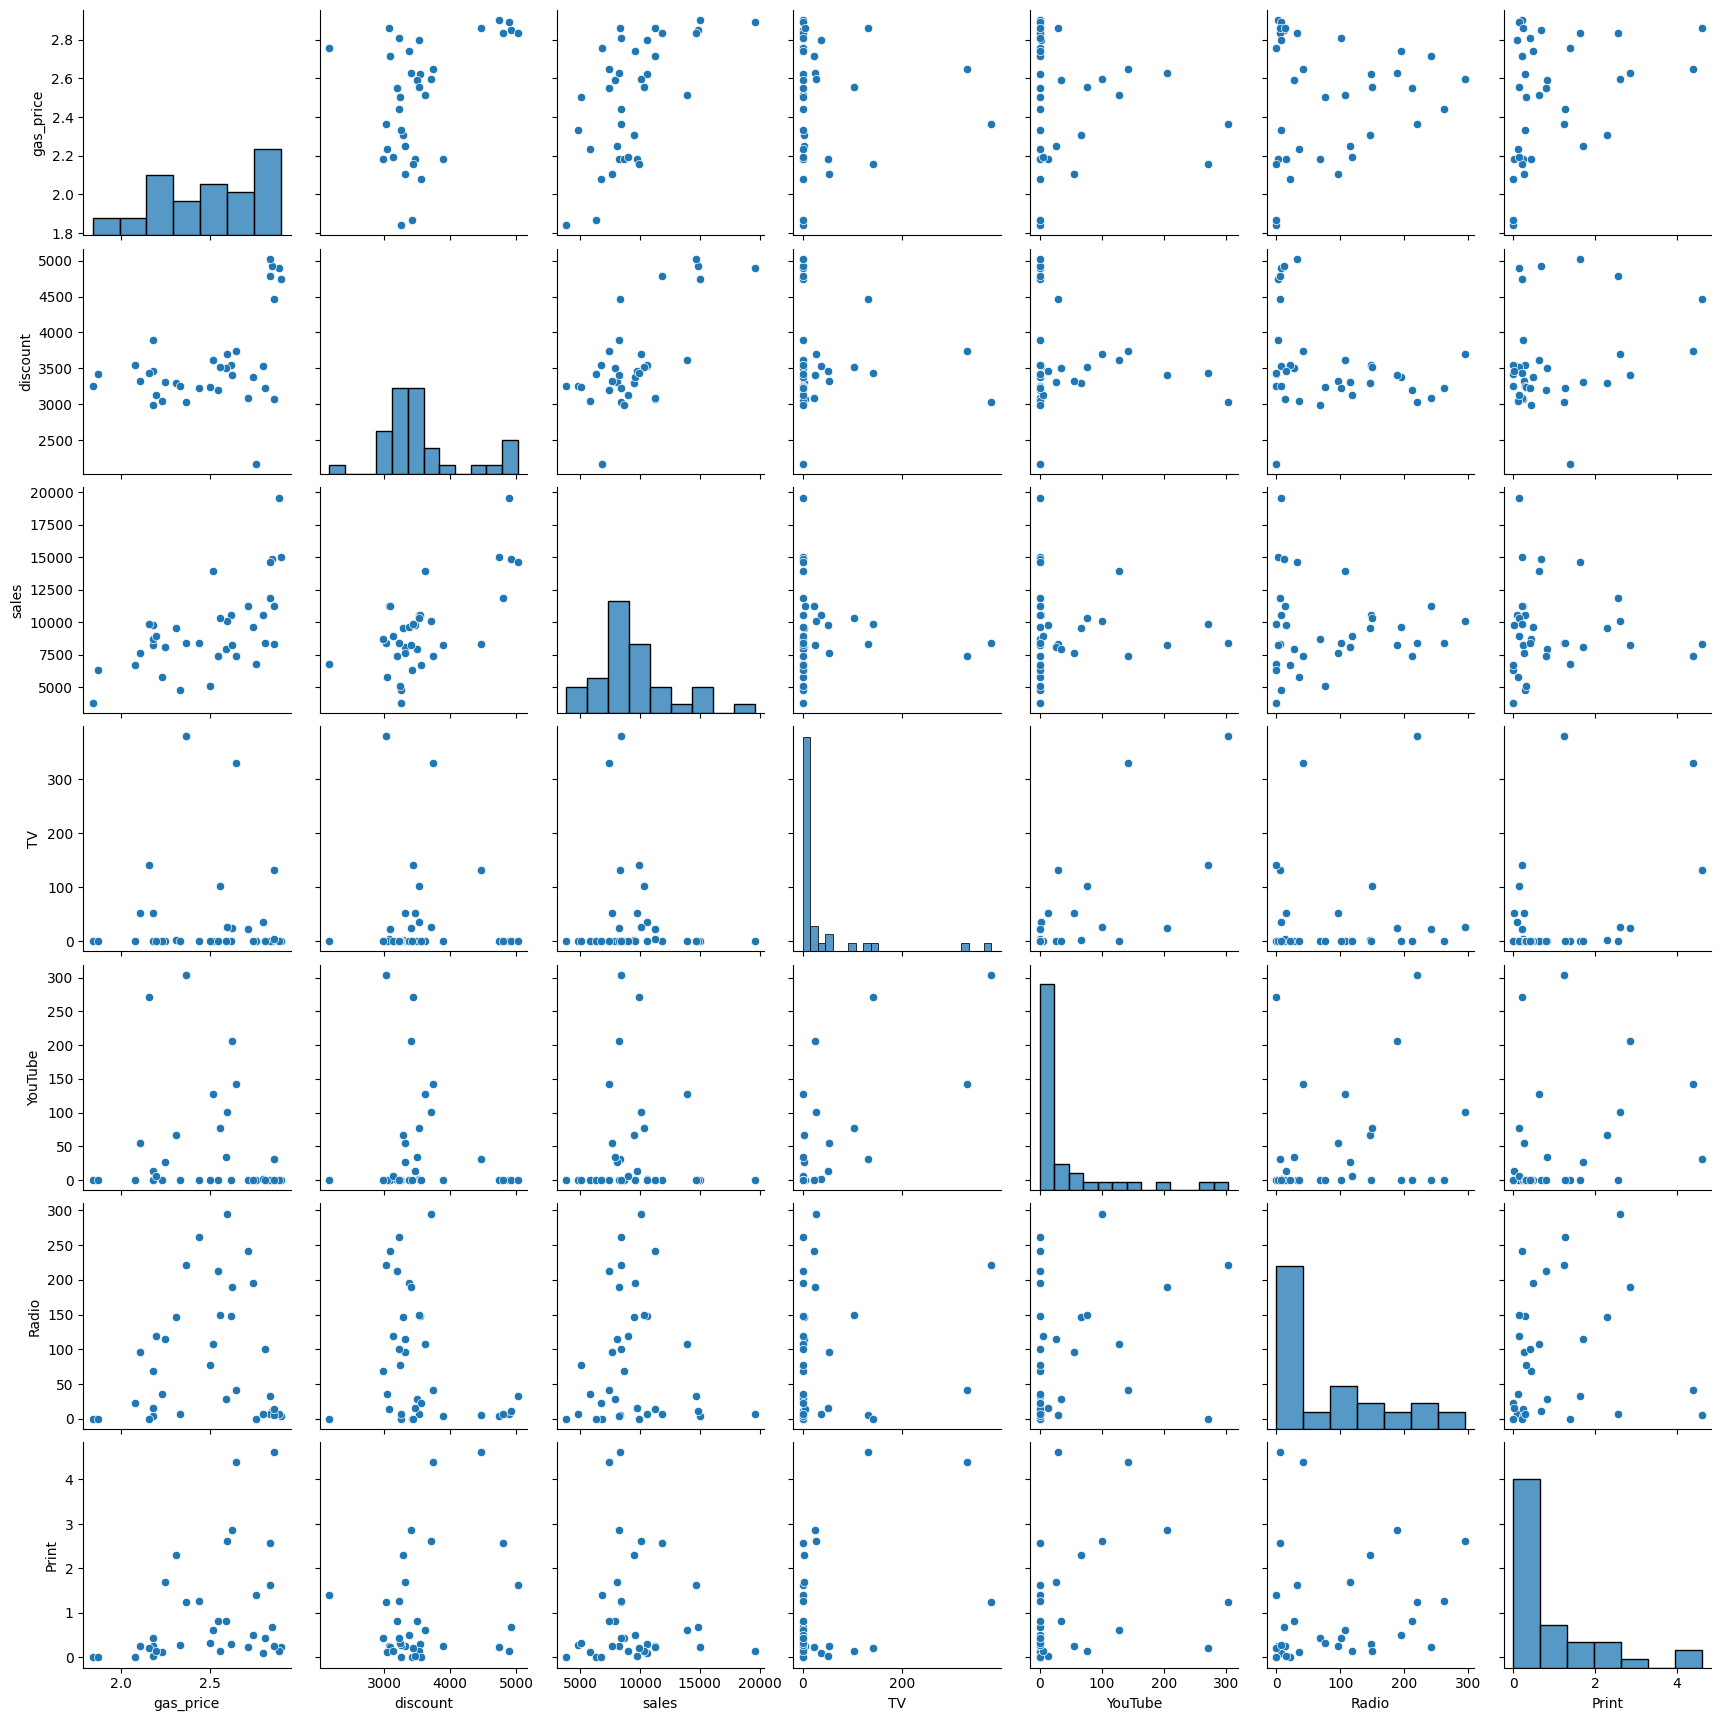

In [13]:
sns.pairplot(modeling_data)

In [14]:
# Drop non-numeric or unnecessary columns
X = modeling_data.drop(['sales', 'month', 'model'], axis=1)

# Create VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF
print("\nMulticollinearity (VIF):")
print(vif_data)


Multicollinearity (VIF):
     feature        VIF
0  gas_price  49.906903
1   discount  44.739455
2         TV   2.834278
3    YouTube   2.963342
4      Radio   2.448114
5      Print   2.139282


- If VIF > 5 then moderate multicollinearity, if VIF > 10 then high multicollinearity

- The variables gas_price and discount show strong multicollinearity, as indicated by their high VIF values (above 40), suggesting they are highly correlated with each other or with other predictors

###7. Calculate the MAPE of the model.

In [15]:
y_pred = linear_model.predict(X)

mape = mean_absolute_percentage_error(modeling_data['sales'], y_pred)
print("MAPE:", round(mape, 2))

MAPE: 0.16
